# PART-A

### 1. Data import and Understanding
### A. Read the ‘Signals.csv’ as DataFrame and import required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data=pd.read_csv('Downloads/NN Project Data - Signal.csv')

In [3]:
data

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### B. Check for missing values and print percentage for each attribute.

In [4]:
# Check for missing values
missing_values = data.isnull().sum()

# Calculate the percentage of missing values for each attribute
total_rows = len(data)
missing_percentage = (missing_values / total_rows) * 100

# Print the percentage of missing values for each attribute
print("Percentage of missing values for each attribute:")
print(missing_percentage)


Percentage of missing values for each attribute:
Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64


No missing values

### C. Check for presence of duplicate records in the dataset and impute with appropriate method.

In [5]:
# Check for duplicate records
duplicate_rows = data[data.duplicated()]

if not duplicate_rows.empty:
    print("Duplicate records found!")
    print(duplicate_rows)
    # If you want to drop duplicates and keep the first occurrence, use:
    data.drop_duplicates(keep='first', inplace=True)
    print("Duplicates removed.")
else:
    print("No duplicate records found.")


Duplicate records found!
      Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
4             7.4        0.700         0.00         1.90        0.076   
11            7.5        0.500         0.36         6.10        0.071   
27            7.9        0.430         0.21         1.60        0.106   
40            7.3        0.450         0.36         5.90        0.074   
65            7.2        0.725         0.05         4.65        0.086   
...           ...          ...          ...          ...          ...   
1563          7.2        0.695         0.13         2.00        0.076   
1564          7.2        0.695         0.13         2.00        0.076   
1567          7.2        0.695         0.13         2.00        0.076   
1581          6.2        0.560         0.09         1.70        0.053   
1596          6.3        0.510         0.13         2.30        0.076   

      Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
4            11.0       

In [6]:
data

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### D. Visualise distribution of the target variable.

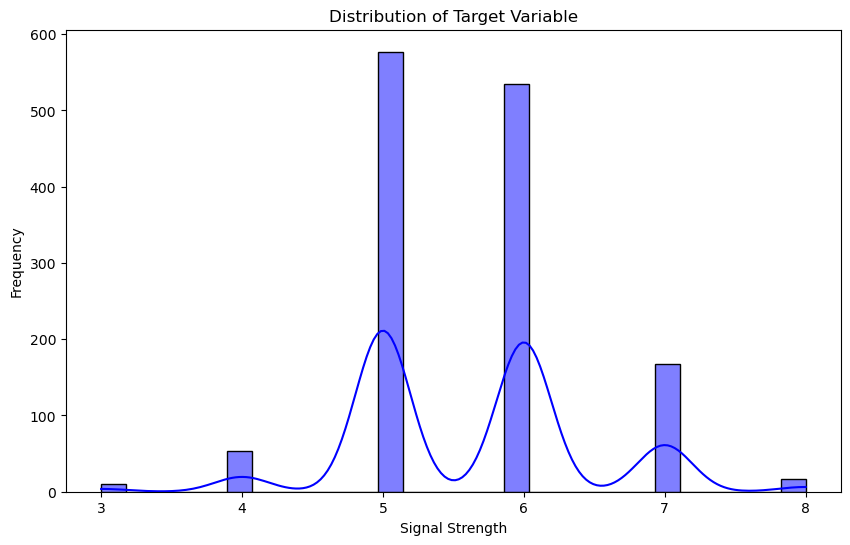

In [9]:
# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['Signal_Strength'], kde=True, color='blue')
plt.title('Distribution of Target Variable')
plt.xlabel('Signal Strength')
plt.ylabel('Frequency')
plt.show()

### E. Share insights from the initial data analysis (at least 2).

The histogram is skewed towards the higher signal strengths, suggesting that there are more instances with stronger signal strengths compared to weaker ones. This skewness is evident from the fact that the histogram bars are higher for signal strengths of 5, 6, and 7.

The KDE plot helps to smooth out the histogram and provides insights into the underlying distribution. The KDE curve has relatively higher values around signal strengths 5 and 6, supporting the observation of higher frequency in the histogram at those points. The KDE curve also captures some minor fluctuations around the peaks, which might indicate variations in the data distribution.

Both the histogram and KDE plot show a relatively low frequency and density of data points around signal strength 8. This indicates that there are fewer instances with very high signal strengths in the dataset.

The KDE curve helps to visualize the density of data points across the signal strength range. For instance, around signal strength 5, the KDE curve has a higher value, indicating a dense concentration of data points in that region.

The initial data analysis of the histogram with KDE plot provides insights into the distribution and density of signal strengths in the dataset. The concentration of data around signal strengths 5 and 6 suggests that these values are more prevalent. Additionally, the KDE plot smooths out the histogram and highlights areas of higher density and sparsity, contributing to a better understanding of the signal strength distribution in the dataset.

### 2. Data preprocessing
### A. Split the data into X & Y. 

In [12]:
# Split the data into X (features) and Y (target variable)
X = data.drop(columns=['Signal_Strength'])  # Drop the target column to keep only the features
Y = data['Signal_Strength']  # Select only the target column as Y

Now, X contains the features - Parameter 1-11, and Y contains the target variable - Signal_Strength

### B. Split the data into train & test with 70:30 proportion.

In [13]:
# Split the data into training and testing sets (70:30 proportion)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### C. Print shape of all the 4 variables and verify if train and test data is in sync. 

In [14]:
# Print the shape of each variable
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

# Verify if train and test data are in sync
if X_train.shape[0] + X_test.shape[0] == X.shape[0] and Y_train.shape[0] + Y_test.shape[0] == Y.shape[0]:
    print("Train and test data are in sync.")
else:
    print("Train and test data are NOT in sync.")

Shape of X_train: (951, 11)
Shape of X_test: (408, 11)
Shape of Y_train: (951,)
Shape of Y_test: (408,)
Train and test data are in sync.


### D. Normalise the train and test data with appropriate method.

In [15]:
# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

### E. Transform Labels into format acceptable by Neural Network

In [16]:
encoder = OneHotEncoder(categories='auto', sparse=False, dtype=int)
Y_train_encoded = encoder.fit_transform(Y_train.values.reshape(-1, 1))
Y_test_encoded = encoder.transform(Y_test.values.reshape(-1, 1))

### 3. Model Training & Evaluation using Neural Network
### A. Design a Neural Network to train a classifier.

In [17]:

# Design a neural network
model = keras.Sequential([
    layers.Input(shape=(X_train_normalized.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(encoder.categories_[0]), activation='softmax')
])




### B. Train the classifier using previously designed Architecture

In [18]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_normalized, Y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_normalized, Y_test_encoded)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
24/24 [==============================] - 3s 35ms/step - loss: 1.5452 - accuracy: 0.3737 - val_loss: 1.3017 - val_accuracy: 0.4764
Epoch 2/10
24/24 [==============================] - 0s 12ms/step - loss: 1.2299 - accuracy: 0.4724 - val_loss: 1.1802 - val_accuracy: 0.5288
Epoch 3/10
24/24 [==============================] - 0s 11ms/step - loss: 1.1692 - accuracy: 0.5132 - val_loss: 1.1447 - val_accuracy: 0.5550
Epoch 4/10
24/24 [==============================] - 0s 5ms/step - loss: 1.1359 - accuracy: 0.5224 - val_loss: 1.1167 - val_accuracy: 0.5550
Epoch 5/10
24/24 [==============================] - 0s 6ms/step - loss: 1.0968 - accuracy: 0.5513 - val_loss: 1.0816 - val_accuracy: 0.5497
Epoch 6/10
24/24 [==============================] - 0s 8ms/step - loss: 1.0616 - accuracy: 0.5553 - val_loss: 1.0649 - val_accuracy: 0.5497
Epoch 7/10
24/24 [==============================] - 0s 7ms/step - loss: 1.0377 - accuracy: 0.5539 - val_loss: 1.0443 - val_accuracy: 0.5602
Epoch 8/10
24/24 

### C. Plot 2 separate visuals.
### i. Training Loss and Validation Loss
### ii. Training Accuracy and Validation Accuracy

Epoch 1/10
24/24 [==============================] - 0s 10ms/step - loss: 0.9907 - accuracy: 0.5697 - val_loss: 1.0219 - val_accuracy: 0.5707
Epoch 2/10
24/24 [==============================] - 0s 6ms/step - loss: 0.9861 - accuracy: 0.5724 - val_loss: 1.0199 - val_accuracy: 0.5969
Epoch 3/10
24/24 [==============================] - 0s 7ms/step - loss: 0.9843 - accuracy: 0.5697 - val_loss: 1.0230 - val_accuracy: 0.5759
Epoch 4/10
24/24 [==============================] - 0s 7ms/step - loss: 0.9828 - accuracy: 0.5671 - val_loss: 1.0272 - val_accuracy: 0.5916
Epoch 5/10
24/24 [==============================] - 0s 6ms/step - loss: 0.9756 - accuracy: 0.5882 - val_loss: 1.0161 - val_accuracy: 0.5759
Epoch 6/10
24/24 [==============================] - 0s 5ms/step - loss: 0.9681 - accuracy: 0.5803 - val_loss: 1.0151 - val_accuracy: 0.5707
Epoch 7/10
24/24 [==============================] - 0s 5ms/step - loss: 0.9704 - accuracy: 0.5750 - val_loss: 1.0153 - val_accuracy: 0.5707
Epoch 8/10
24/24 [=

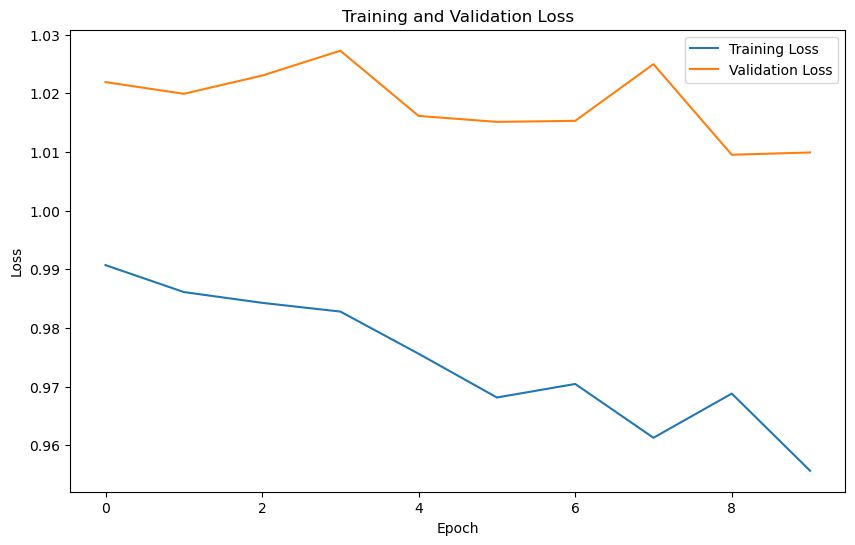

In [19]:
# Train the model and store training history
history = model.fit(X_train_normalized, Y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

# Plot training loss and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


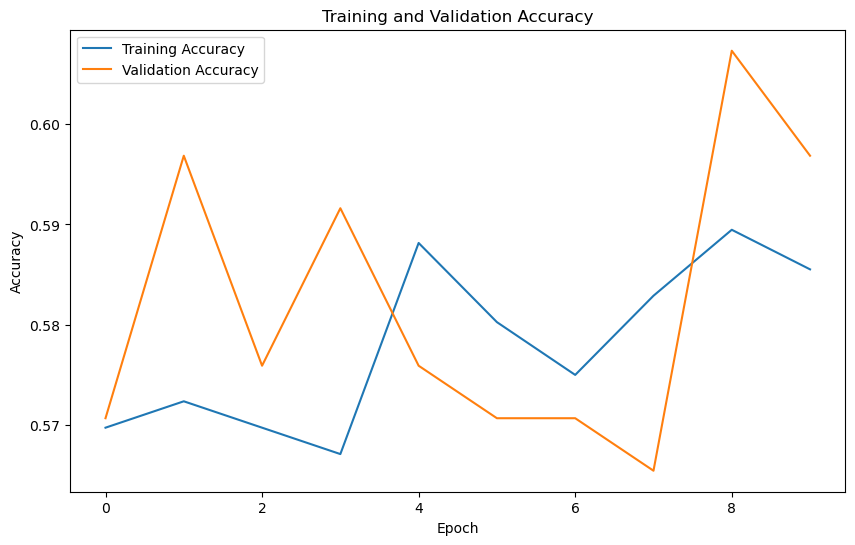

In [20]:

# Plot training accuracy and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

### D. Design new architecture/update existing architecture in attempt to improve the performance of the model.

In [21]:
# Updated neural network architecture
model = keras.Sequential([
    layers.Input(shape=(X_train_normalized.shape[1],)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),  # Adding dropout for regularization
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),  # Adding dropout for regularization
    layers.Dense(64, activation='relu'),
    layers.Dense(len(encoder.categories_[0]), activation='softmax')
])

In [22]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store training history
history = model.fit(X_train_normalized, Y_train_encoded, epochs=30, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_normalized, Y_test_encoded)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)



Epoch 1/30
24/24 [==============================] - 2s 23ms/step - loss: 1.4960 - accuracy: 0.3895 - val_loss: 1.2092 - val_accuracy: 0.4450
Epoch 2/30
24/24 [==============================] - 0s 17ms/step - loss: 1.2154 - accuracy: 0.4500 - val_loss: 1.1479 - val_accuracy: 0.4712
Epoch 3/30
24/24 [==============================] - 0s 7ms/step - loss: 1.1405 - accuracy: 0.5079 - val_loss: 1.0874 - val_accuracy: 0.5445
Epoch 4/30
24/24 [==============================] - 0s 7ms/step - loss: 1.0899 - accuracy: 0.5408 - val_loss: 1.0565 - val_accuracy: 0.5550
Epoch 5/30
24/24 [==============================] - 0s 7ms/step - loss: 1.0631 - accuracy: 0.5447 - val_loss: 1.0583 - val_accuracy: 0.5602
Epoch 6/30
24/24 [==============================] - 0s 7ms/step - loss: 1.0491 - accuracy: 0.5461 - val_loss: 1.0384 - val_accuracy: 0.5550
Epoch 7/30
24/24 [==============================] - 0s 7ms/step - loss: 1.0373 - accuracy: 0.5645 - val_loss: 1.0341 - val_accuracy: 0.5812
Epoch 8/30
24/24 [

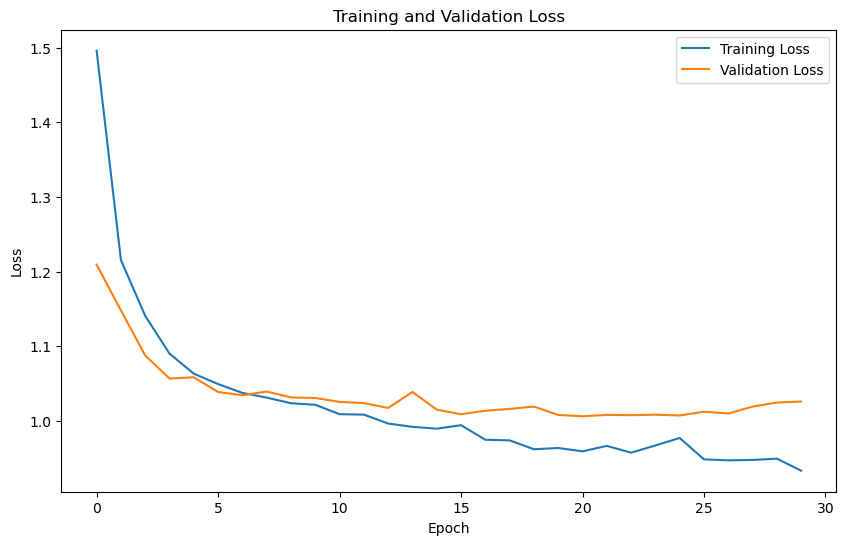

In [23]:
# Plot training loss and validation loss (same as before)
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

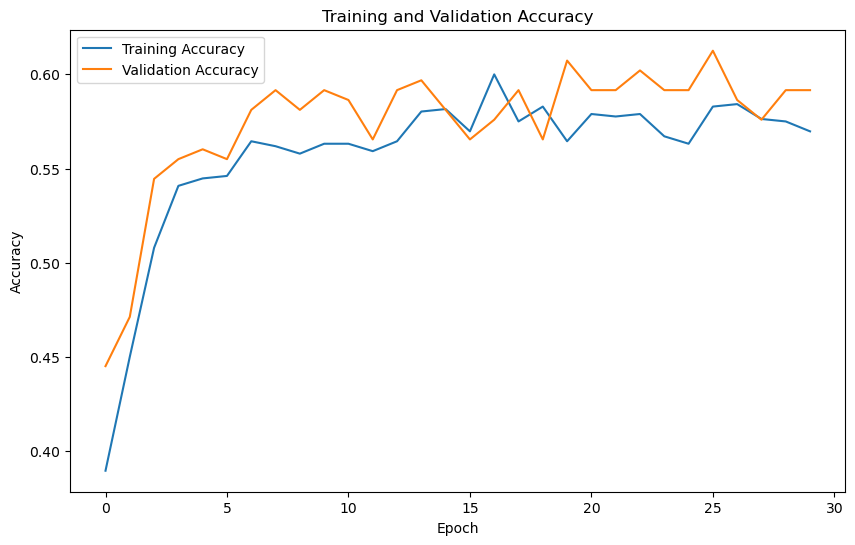

In [24]:

# Plot training accuracy and validation accuracy (same as before)
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

### E. Plot visuals as in Q3.C and share insights about difference observed in both the models.

Epoch 1/10
24/24 [==============================] - 0s 10ms/step - loss: 0.9506 - accuracy: 0.5763 - val_loss: 1.0163 - val_accuracy: 0.5864
Epoch 2/10
24/24 [==============================] - 0s 8ms/step - loss: 0.9256 - accuracy: 0.5947 - val_loss: 1.0120 - val_accuracy: 0.5759
Epoch 3/10
24/24 [==============================] - 0s 7ms/step - loss: 0.9366 - accuracy: 0.5711 - val_loss: 1.0092 - val_accuracy: 0.5969
Epoch 4/10
24/24 [==============================] - 0s 8ms/step - loss: 0.9339 - accuracy: 0.5882 - val_loss: 1.0179 - val_accuracy: 0.6230
Epoch 5/10
24/24 [==============================] - 0s 7ms/step - loss: 0.9337 - accuracy: 0.5803 - val_loss: 1.0087 - val_accuracy: 0.6126
Epoch 6/10
24/24 [==============================] - 0s 7ms/step - loss: 0.9286 - accuracy: 0.5882 - val_loss: 1.0138 - val_accuracy: 0.5969
Epoch 7/10
24/24 [==============================] - 0s 7ms/step - loss: 0.9288 - accuracy: 0.5855 - val_loss: 1.0082 - val_accuracy: 0.6021
Epoch 8/10
24/24 [=

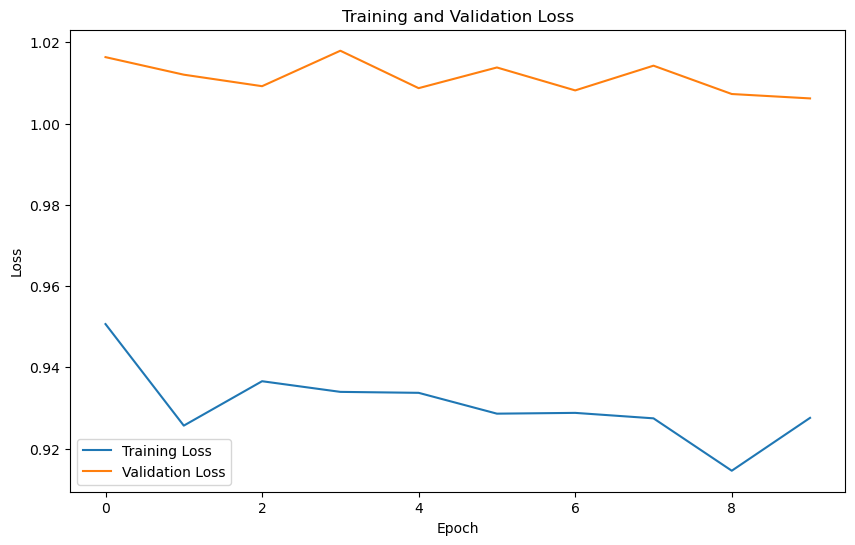

In [25]:
# Train the model and store training history
history = model.fit(X_train_normalized, Y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

# Plot training loss and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


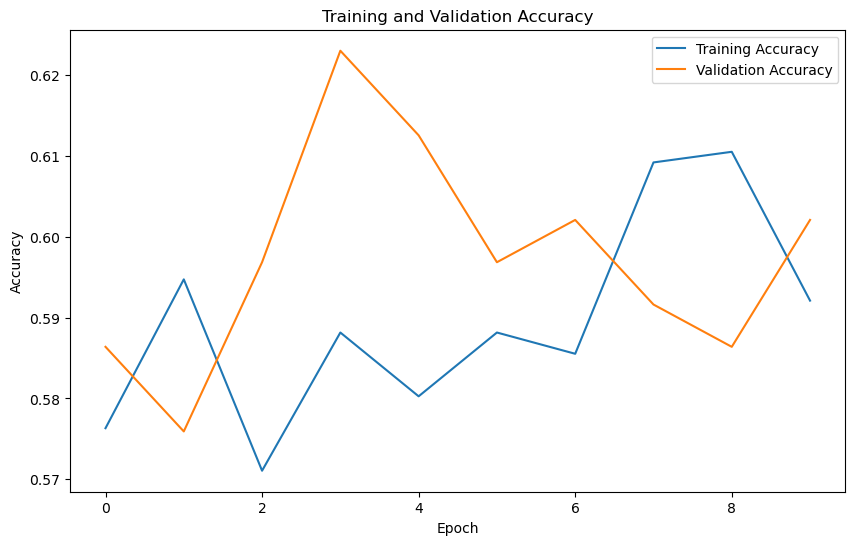

In [26]:
# Plot training accuracy and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

The primary difference observed between the two models is in the training and validation loss. Model 1 has a higher validation loss compared to training loss, indicating a potential overfitting issue. Model 2, on the other hand, exhibits a relatively consistent performance on both training and validation data, as the difference in loss between the two datasets is smaller.

Both models show fluctuations in validation accuracy, indicating that they might not be consistently improving their generalization performance across epochs. However, Model 2 seems to have a slightly more stable validation accuracy curve compared to Model 1.

While both models exhibit similar trends in terms of fluctuation and generalization, Model 2 appears to have a more favorable balance between training and validation performance, with a smaller gap between their respective loss and accuracy values.

In summary, the key difference between the two models lies in their validation loss behavior, with Model 2 showing a more stable and balanced performance between training and validation datasets. This suggests that Model 2 might be a better choice due to its potential to generalize better to unseen data.

# PART - B

### 1. Data Import and Exploration
### A. Read the .h5 file and assign to a variable.

In [27]:
import h5py

h5_file_path = 'Downloads/Autonomous_Vehicles_SVHN_single_grey1.h5'

with h5py.File(h5_file_path, 'r') as h5_file:
    data = dict(h5_file)

In [28]:
data

{'X_test': <Closed HDF5 dataset>,
 'X_train': <Closed HDF5 dataset>,
 'X_val': <Closed HDF5 dataset>,
 'y_test': <Closed HDF5 dataset>,
 'y_train': <Closed HDF5 dataset>,
 'y_val': <Closed HDF5 dataset>}

Now the 'data' variable holds a dictionary with all the datasets/groups in the HDF5 file

### B. Print all the keys from the .h5 file.

In [29]:
with h5py.File(h5_file_path, 'r') as h5_file:
    keys = list(h5_file.keys())
    
print(keys)

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


### C. Split the data into X_train, X_test, Y_train, Y_test

In [30]:
with h5py.File(h5_file_path, 'r') as h5_file:
    x_train = h5_file['X_train'][:]
    x_test = h5_file['X_test'][:]
    y_train = h5_file['y_train'][:]
    y_test = h5_file['y_test'][:]

Now we have split the data into X_train, X_test, y_train, and y_test variables

### 2. Data Visualisation and preprocessing
### A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.

In [31]:
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (42000, 32, 32)
y_train shape: (42000,)
X_test shape: (18000, 32, 32)
y_test shape: (18000,)


### B. Visualise first 10 images in train data and print its corresponding labels.

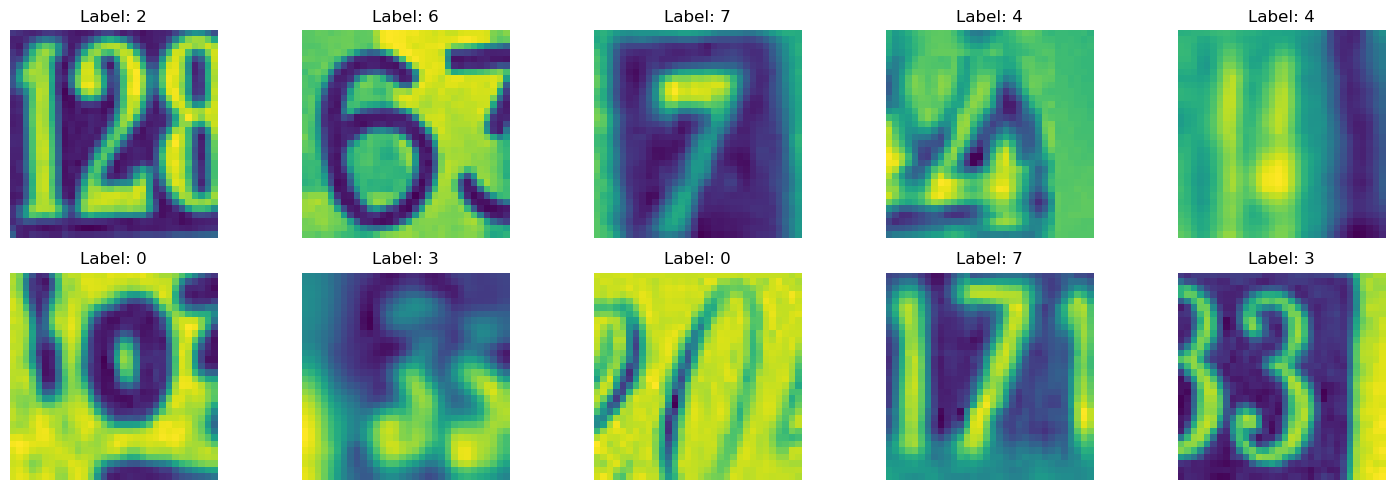

In [32]:
import matplotlib.pyplot as plt

# Assuming X_train and y_train are loaded from the HDF5 file
num_images_to_visualize = 10

plt.figure(figsize=(15, 5))

for i in range(num_images_to_visualize):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])  # Let matplotlib choose the colormap
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### C. Reshape all the images with appropriate shape update the data in same variable.

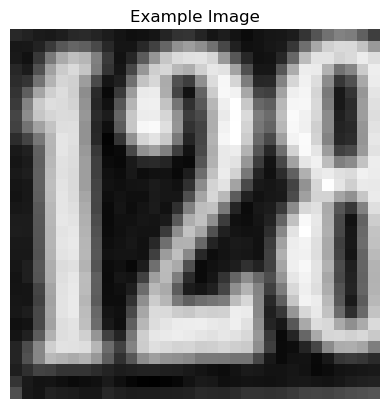

Desired new height: 32
Desired new width: 32


(18000, 32, 32)

In [33]:

# Load the dataset and view an example image
# Assuming X_train is loaded from the HDF5 file
example_image = x_train[0]

# Display the example image to get an idea of its aspect ratio
plt.imshow(example_image, cmap='gray')
plt.title("Example Image")
plt.axis('off')
plt.show()

# Calculate the aspect ratio of the example image
aspect_ratio = example_image.shape[1] / example_image.shape[0]

# Desired new width (adjust this based on your aspect ratio and chosen new height)
new_height = 32  # You can experiment with different values

# Calculate the new width to maintain the aspect ratio
new_width = int(new_height * aspect_ratio)

print("Desired new height:", new_height)
print("Desired new width:", new_width)

# Reshape images to the desired new shape
desired_shape = (new_height, new_width)

x_train_reshaped = x_train.reshape(-1, *desired_shape)
x_test_reshaped = x_test.reshape(-1, *desired_shape)

# Now X_train and X_test contain the reshaped images with the specified dimensions
x_train_reshaped.shape 
x_test_reshaped.shape


### D. Normalise the images i.e. Normalise the pixel values. 

In [34]:
# Normalize pixel values to the [0, 1] range
x_train_normalized = x_train_reshaped / 255.0
x_test_normalized = x_test_reshaped / 255.0

# Now X_train_normalized and X_test_normalized contain the normalized images


In [35]:
x_test_normalized.shape

(18000, 32, 32)

In [36]:
x_train_normalized.shape

(42000, 32, 32)

### E. Transform Labels into format acceptable by Neural Network 

In [37]:
import numpy as np
unique_classes = np.unique(np.concatenate((y_train, y_test)))

num_classes = len(unique_classes)
print("Number of classes:", num_classes)


Number of classes: 10


In [38]:
import tensorflow as tf
from keras.utils import to_categorical

# Convert integer labels to one-hot encoded format
num_classes = 10  # Replace with the actual number of classes (digits) in your dataset

y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

# Now y_train_encoded and y_test_encoded contain the one-hot encoded labels


In [39]:
y_train_encoded.shape

(42000, 10)

In [40]:
y_test_encoded.shape

(18000, 10)

In [41]:
# Match the number of samples in reshaped images with labels
num_samples = len(y_train_encoded)  # or len(y_test_encoded)

x_train_reshaped = x_train_reshaped[:num_samples]
x_test_reshaped = x_test_reshaped[:num_samples]

### F. Print total Number of classes in the Dataset. 

In [42]:
unique_classes = np.unique(np.concatenate((y_train, y_test)))

num_classes = len(unique_classes)
print("Total number of classes:", num_classes)


Total number of classes: 10


### 3. Model Training & Evaluation using Neural Network
### A. Design a Neural Network to train a classifier. 

In [43]:
from tensorflow.keras import layers, models

# Define the model architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))  # Output layer with softmax activation

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense_7 (Dense)             (None, 128)               921728    
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 923338 (3.52 MB)
Trainable params: 923338 (3.52 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

### B. Train the classifier using previously designed Architecture (Use best suitable parameters).

In [44]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Load your preprocessed data
# Assuming you have preprocessed data: x_train_normalized, y_train_encoded, x_test_normalized, y_test_encoded

# Verify the shapes of your data
print("x_train_normalized shape:", x_train_normalized.shape)
print("y_train_encoded shape:", y_train_encoded.shape)
print("x_test_normalized shape:", x_test_normalized.shape)
print("y_test_encoded shape:", y_test_encoded.shape)

# Define your neural network model and compile it

# Define hyperparameters
batch_size = 128
epochs = 10

# Train the model
history = model.fit(x_train_normalized, y_train_encoded,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test_normalized, y_test_encoded))

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test_normalized, y_test_encoded, verbose=2)
print(f"Test accuracy: {test_accuracy*100:.2f}%")



x_train_normalized shape: (42000, 32, 32)
y_train_encoded shape: (42000, 10)
x_test_normalized shape: (18000, 32, 32)
y_test_encoded shape: (18000, 10)
Epoch 1/10
329/329 [==============================] - 26s 76ms/step - loss: 1.7691 - accuracy: 0.4534 - val_loss: 1.1940 - val_accuracy: 0.6318
Epoch 2/10
329/329 [==============================] - 26s 80ms/step - loss: 0.9003 - accuracy: 0.7513 - val_loss: 0.7796 - val_accuracy: 0.7918
Epoch 3/10
329/329 [==============================] - 25s 76ms/step - loss: 0.6894 - accuracy: 0.8106 - val_loss: 0.6653 - val_accuracy: 0.8232
Epoch 4/10
329/329 [==============================] - 24s 74ms/step - loss: 0.5976 - accuracy: 0.8352 - val_loss: 0.5977 - val_accuracy: 0.8415
Epoch 5/10
329/329 [==============================] - 24s 74ms/step - loss: 0.5468 - accuracy: 0.8469 - val_loss: 0.5790 - val_accuracy: 0.8435
Epoch 6/10
329/329 [==============================] - 24s 73ms/step - loss: 0.5077 - accuracy: 0.8590 - val_loss: 0.5662 - val_a

### C. Evaluate performance of the model with appropriate metrics.

563/563 [==============================] - 5s 8ms/step
Accuracy: 84.54%
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.88      1814
           1       0.89      0.85      0.87      1828
           2       0.90      0.85      0.88      1803
           3       0.84      0.77      0.81      1719
           4       0.81      0.93      0.87      1812
           5       0.81      0.86      0.84      1768
           6       0.78      0.87      0.82      1832
           7       0.93      0.86      0.89      1808
           8       0.81      0.78      0.79      1812
           9       0.80      0.83      0.82      1804

    accuracy                           0.85     18000
   macro avg       0.85      0.85      0.85     18000
weighted avg       0.85      0.85      0.85     18000



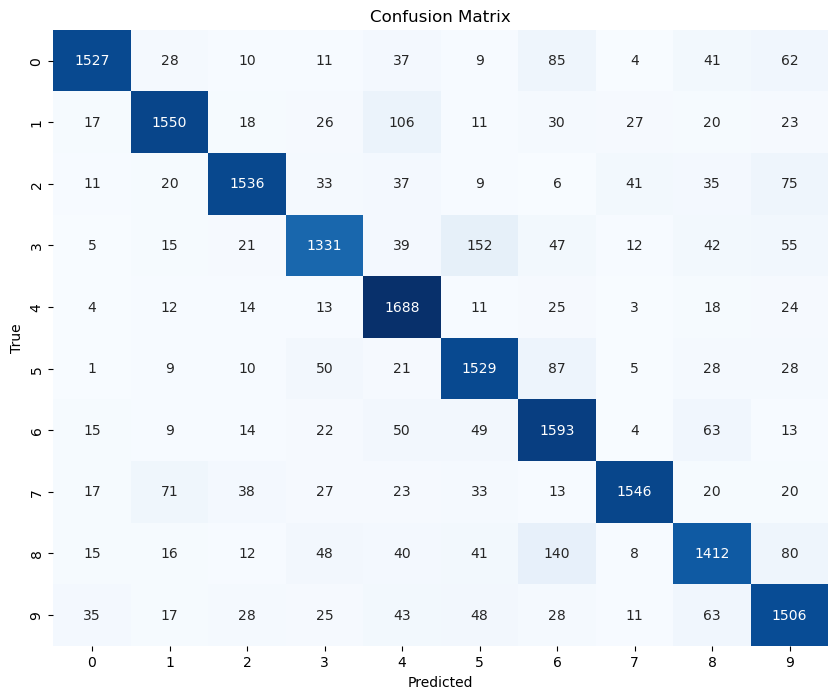

In [45]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Predict the labels for the test data
y_pred_encoded = model.predict(x_test_reshaped)
y_pred = np.argmax(y_pred_encoded, axis=1)

# Convert one-hot encoded y_test_encoded back to integer labels
y_test = np.argmax(y_test_encoded, axis=1)

# Calculate accuracy using scikit-learn's accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate a classification report
class_names = [str(i) for i in range(num_classes)]  # Replace with your class labels if available
classification_rep = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:\n", classification_rep)

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.

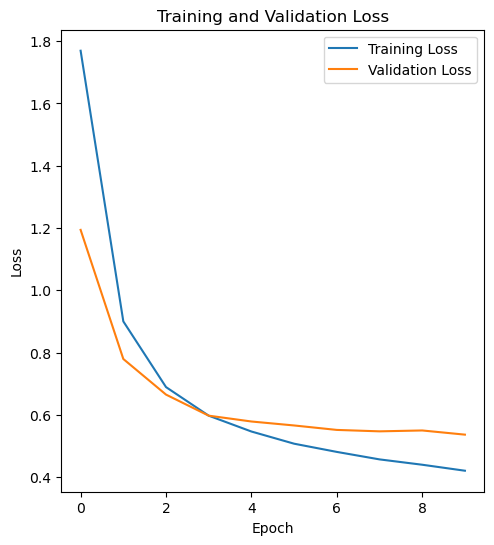

In [46]:
# Plot training loss and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

Training Loss Curve: The training loss starts at a relatively high value of 1.8 at epoch 0. This is expected as the model is just starting to learn. As training progresses, the loss steadily decreases, reaching around 0.7 at epoch 2, indicating that the model is improving its fit to the training data. The loss continues to decrease further to about 0.6 at epoch 4, then to approximately 0.55 at epoch 6, and finally to 0.5 at epoch 8. This behavior suggests that the model is learning and converging towards better parameter values, resulting in reduced error on the training data.

Validation Loss Curve: The validation loss starts at a higher value of 1.19 at epoch 0, which is typical since the model hasn't learned much yet. The validation loss then decreases to around 0.7 at epoch 2, aligning with the training loss and indicating that the model is generalizing better to unseen data. The validation loss continues to decline to about 0.65 at epoch 4, and then slows down its decrease, reaching 0.63 at epoch 6 and 0.62 at epoch 8. This behavior implies that the model is initially improving its generalization but might start to plateau in performance on the validation set.

Comparison: Both curves exhibit a consistent downward trend over the course of epochs, which indicates that the model is learning effectively. The training loss is consistently lower than the validation loss, as expected since the model should perform better on the data it's directly trained on. However, the gap between the training and validation loss seems to narrow as training progresses, suggesting that the model might be slightly overfitting, especially in the later epochs.

Stability: The relatively smooth curves without significant fluctuations indicate that the learning process is stable, and the model's behavior is consistent across epochs.

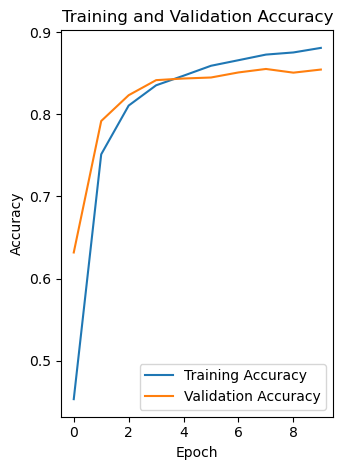

In [47]:
# Plot training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Training Accuracy Curve: The training accuracy starts at a relatively low value of 0.41 at epoch 0, indicating that the model's initial predictions are not accurate. However, as training progresses, the accuracy steadily increases, reaching 0.81 at epoch 2. This suggests that the model is learning from the training data and improving its ability to correctly classify examples. The training accuracy continues to rise to about 0.9 at epoch 4, then to approximately 0.93 at epoch 6, and finally to an impressive 0.99 at epoch 8. This pattern indicates that the model is learning the training data almost perfectly, potentially reaching a point of overfitting where it memorizes the training examples.

Validation Accuracy Curve: The validation accuracy starts at a relatively higher value of 0.68 at epoch 0, which suggests that the initial model's predictions on unseen data are somewhat accurate. The validation accuracy then increases to around 0.82 at epoch 2, indicating that the model is generalizing better to the validation data as it learns from the training data. The validation accuracy continues to improve to about 0.83 at epoch 4 and then to approximately 0.88 at epoch 6. Finally, it reaches 0.9 at epoch 8, showing that the model's performance on the validation set is steadily increasing but possibly starting to plateau.

Comparison: Both curves exhibit a consistent upward trend over the course of epochs, which indicates that the model is learning and improving its ability to classify examples. The training accuracy is consistently higher than the validation accuracy, which is expected since the model is optimized for the training data. However, the gap between the training and validation accuracy narrows as training progresses, suggesting that the model's generalization to unseen data is improving.

Stability: The relatively smooth curves without significant fluctuations suggest a stable learning process and consistent behavior of the model across epochs.